## 📊 Load Sample Data

First, let's create a realistic sample dataset with common issues (missing values, outliers, mixed data types, etc.)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create sample data with realistic issues
np.random.seed(42)
n_samples = 1000

data = {
    'customer_id': range(1, n_samples + 1),
    'age': np.random.randint(18, 80, n_samples),
    'income': np.random.normal(50000, 20000, n_samples),
    'purchase_amount': np.random.gamma(2, 50, n_samples),
    'satisfaction_score': np.random.randint(1, 11, n_samples),
    'registration_date': [datetime(2020, 1, 1) + timedelta(days=int(x)) for x in np.random.randint(0, 1000, n_samples)],
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], n_samples),
    'review_text': np.random.choice(['Great product!', 'Not bad', 'Excellent', 'Poor quality', 'Amazing!'], n_samples),
    'churn': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

# Introduce missing values
df.loc[np.random.choice(df.index, 50), 'age'] = np.nan
df.loc[np.random.choice(df.index, 30), 'income'] = np.nan
df.loc[np.random.choice(df.index, 20), 'satisfaction_score'] = np.nan

# Introduce outliers
df.loc[np.random.choice(df.index, 10), 'income'] = np.random.uniform(200000, 500000, 10)
df.loc[np.random.choice(df.index, 5), 'age'] = np.random.choice([5, 120, 150], 5)

# Introduce data type issues (store numbers as strings)
df['income'] = df['income'].astype(str)
df.loc[np.random.choice(df.index, 5), 'income'] = 'unknown'

print("✅ Sample dataset created!")
print(f"Shape: {df.shape}")
df.head()

✅ Sample dataset created!
Shape: (1000, 9)


,customer_id,age,income,purchase_amount,satisfaction_score,registration_date,product_category,review_text,churn
0,1,56.0,77447.55593094493,77.803350,4.0,2021-10-10,Books,Not bad,1
1,2,69.0,36444.278140132315,93.585053,7.0,2022-04-15,Books,Excellent,0
2,3,46.0,73070.63744015737,4.294550,2.0,2020-12-02,Electronics,Not bad,0
3,4,32.0,42499.78743260372,77.208610,1.0,2020-09-29,Clothing,Not bad,0
4,5,60.0,36117.08092985012,75.595426,3.0,2020-04-26,Food,Excellent,1


---

# Task 1: Data Loading & Initial Exploration

## 📝 Traditional Approach

In [6]:
# Install Ak-dskit from PyPI
!pip install -q Ak-dskit[full]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 89.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 23.1 MB/s eta 0:00:00


In [2]:
# Traditional: Multiple steps for basic exploration
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nMemory Usage:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

Dataset Shape: (1000, 9)

Column Data Types:
customer_id                    int64
age                          float64
income                        object
purchase_amount              float64
satisfaction_score           float64
registration_date     datetime64[ns]
product_category              object
review_text                   object
churn                          int64
dtype: object

Basic Statistics:
       customer_id         age  purchase_amount  satisfaction_score  \
count  1000.000000  951.000000      1000.000000          980.000000   
mean    500.500000   50.335436       102.530509            5.517347   
min       1.000000    5.000000         1.116646            1.000000   
25%     250.750000   35.000000        49.307446            3.000000   
50%     500.500000   50.000000        85.589394            6.000000   
75%     750.250000   66.000000       136.702262            8.000000   
max    1000.000000  150.000000       520.697139           10.000000   
std     288.819436   

## ✨ With Ak-dskit

from sklearn.experimental import enable_iterative_imputer
DATA HEALTH CHECK
Missing Values: 1.1% - Score: 15/20
Duplicates: 0.0% - Score: 15/15
Data Types: 4/9 object columns - Score: 11/15
Consistency Issues: 0 - Score: 25/25
Outliers: 0/5 columns with significant outliers - Score: 25/25

OVERALL DATA HEALTH SCORE: 90.6/100
GRADE: A+ (Excellent)

🎯 Data Health Score: 90.55555555555556/100
=== Basic Statistics ===
                     count unique         top freq        mean         std  \
customer_id         1000.0    NaN         NaN  NaN       500.5  288.819436   
age                  951.0    NaN         NaN  NaN   50.335436   19.031331   
income                 971    967     unknown    5         NaN         NaN   
purchase_amount     1000.0    NaN         NaN  NaN  102.530509   73.431853   
satisfaction_score   980.0    NaN         NaN  NaN    5.517347    2.845477   
registration_date     1000    645  2020-09-11    5         NaN         NaN   
product_category      1000      4   

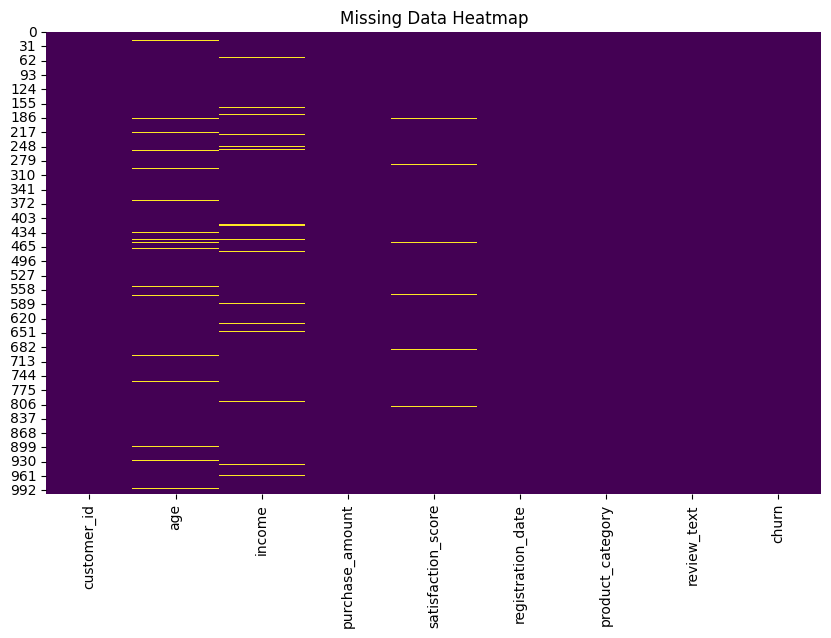

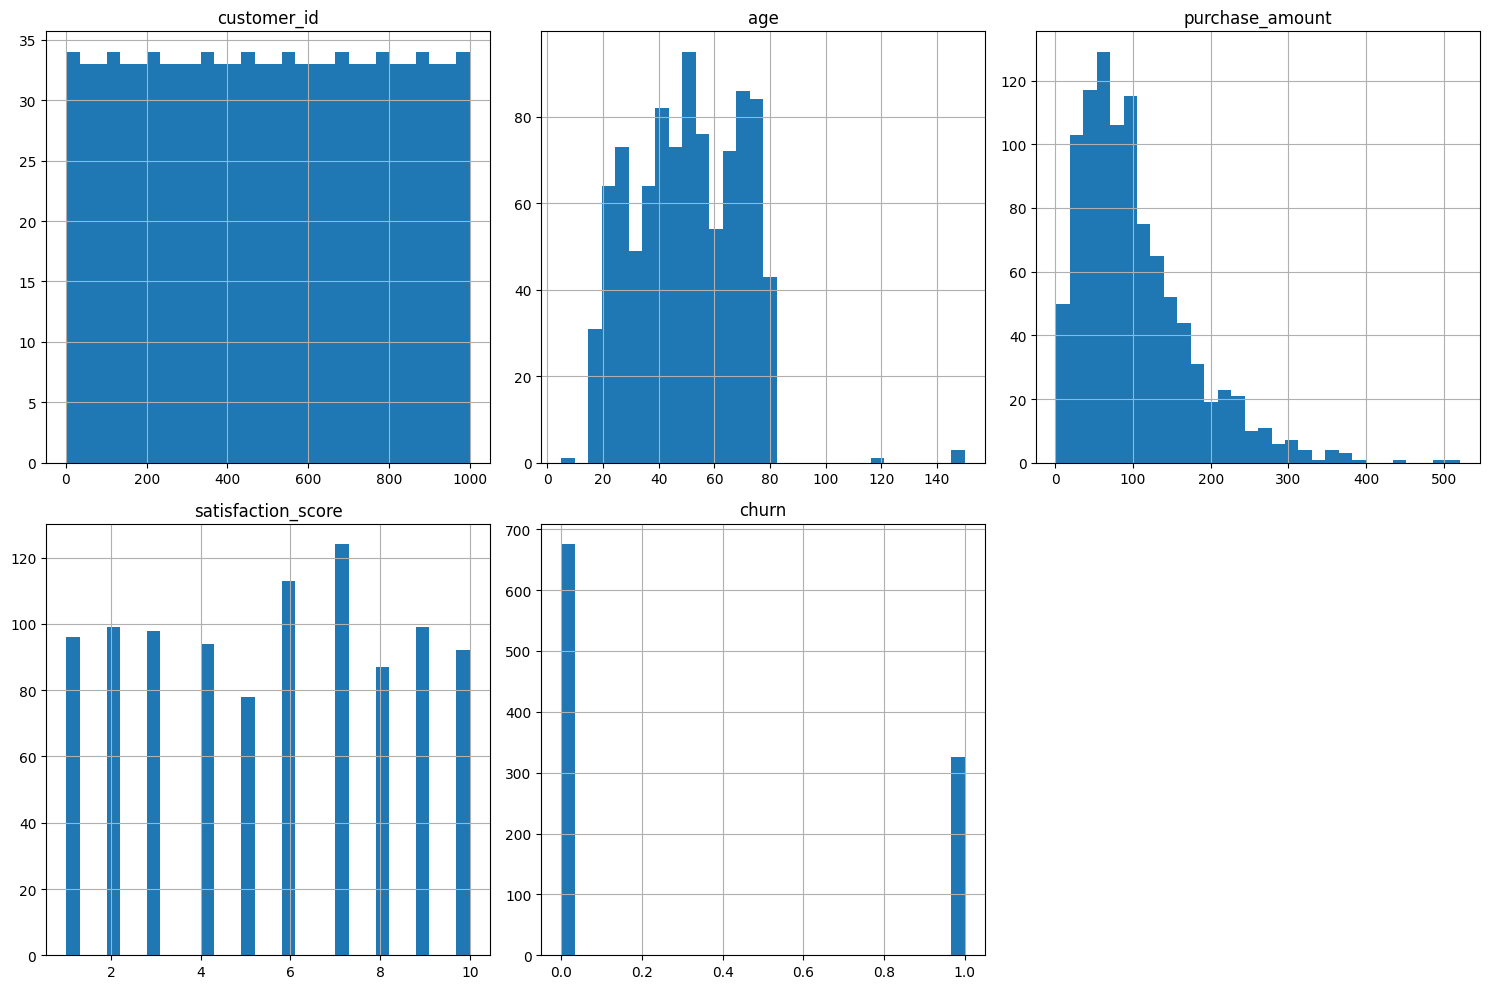

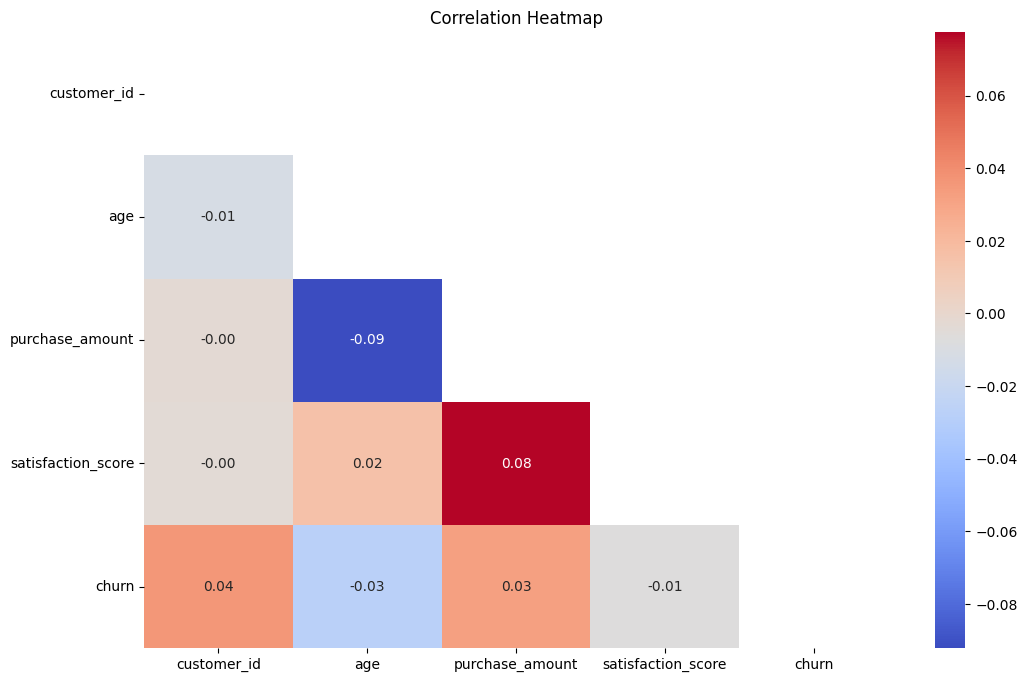

In [7]:
from dskit import dskit

# Save data for loading example
df.to_csv('sample_data.csv', index=False)

# Load and explore with one line
kit = dskit.load('sample_data.csv')

# Get comprehensive health check
health_score = kit.data_health_check()
print(f"\n🎯 Data Health Score: {health_score}/100")

# Quick EDA in one line
kit.quick_eda()

---

# Task 2: Missing Value Analysis & Imputation

## 📝 Traditional Approach

                    Missing Count  Percentage
age                            49         4.9
satisfaction_score             20         2.0


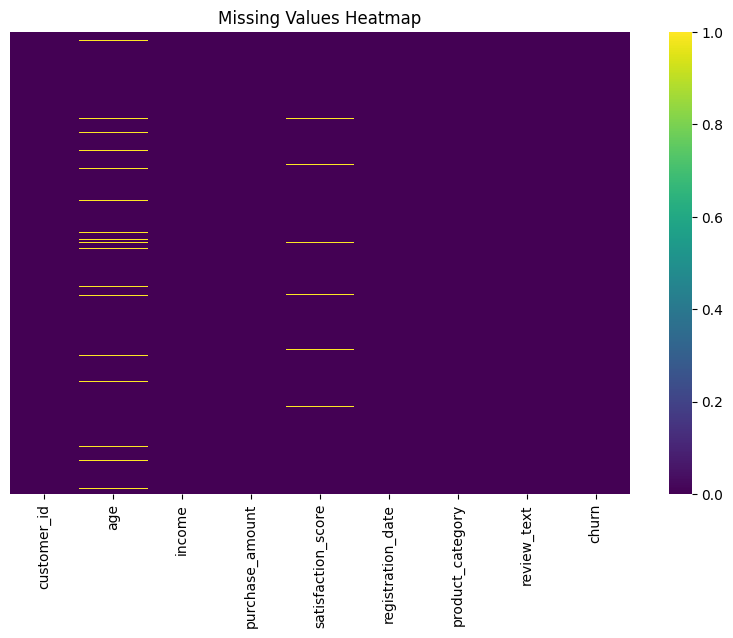


✅ Missing values imputed
Remaining missing: 0


/tmp/ipython-input-3091670451.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['age'].fillna(df_filled['age'].median(), inplace=True)
/tmp/ipython-input-3091670451.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze missing values
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Impute missing values manually
df_filled = df.copy()
df_filled['age'].fillna(df_filled['age'].median(), inplace=True)
df_filled['income'] = pd.to_numeric(df_filled['income'], errors='coerce')
df_filled['income'].fillna(df_filled['income'].median(), inplace=True)
df_filled['satisfaction_score'].fillna(df_filled['satisfaction_score'].mode()[0], inplace=True)

print("\n✅ Missing values imputed")
print(f"Remaining missing: {df_filled.isnull().sum().sum()}")

## ✨ With Ak-dskit

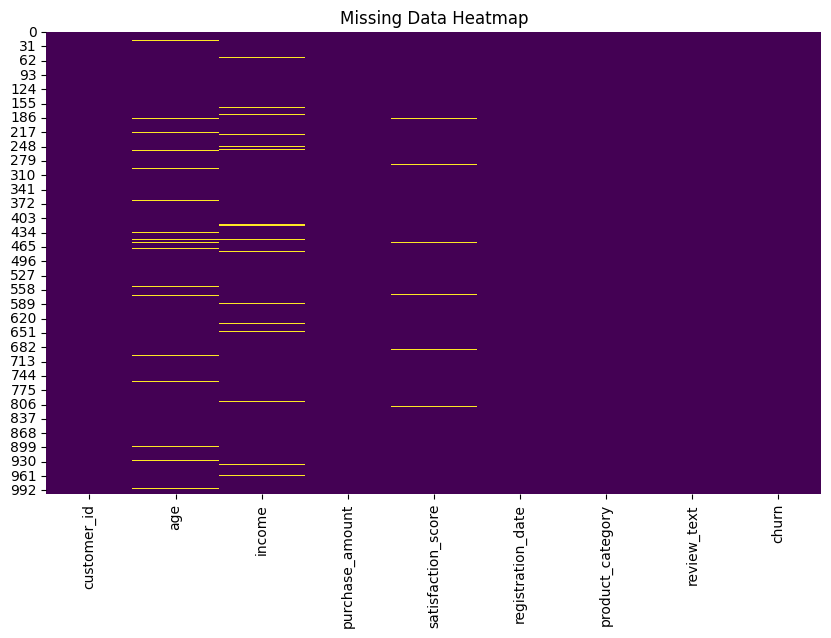

                    Missing Count  Missing %
age                            49        4.9
income                         29        2.9
satisfaction_score             20        2.0

✅ Missing values auto-filled!
Remaining missing: 0


In [9]:
# Visualize missing values with one line
kit.plot_missingness()

# Get detailed missing value summary
missing_summary = kit.missing_summary()
print(missing_summary)

# Auto-fill missing values with intelligent strategy
kit = kit.fill_missing(strategy='auto')
print("\n✅ Missing values auto-filled!")
print(f"Remaining missing: {kit.df.isnull().sum().sum()}")

---

# Task 3: Data Type Correction

## 📝 Traditional Approach

In [ ]:
# Manually identify and fix data types
df_typed = df.copy()

print("Original types:")
print(df_typed.dtypes)

# Convert income from string to numeric
df_typed['income'] = pd.to_numeric(df_typed['income'], errors='coerce')

# Convert registration_date to datetime
df_typed['registration_date'] = pd.to_datetime(df_typed['registration_date'])

# Convert categorical columns
df_typed['product_category'] = df_typed['product_category'].astype('category')

# Convert binary column
df_typed['churn'] = df_typed['churn'].astype('int8')

print("\n✅ Corrected types:")
print(df_typed.dtypes)

## ✨ With Ak-dskit

In [ ]:
# Automatically detect and fix data types
print("Original types:")
print(kit.df.dtypes)

kit = kit.fix_dtypes()

print("\n✅ Auto-corrected types:")
print(kit.df.dtypes)

---

# Task 4: Outlier Detection & Removal

## 📝 Traditional Approach

In [ ]:
# Detect outliers using IQR method
df_no_outliers = df.copy()
df_no_outliers['income'] = pd.to_numeric(df_no_outliers['income'], errors='coerce')

numeric_cols = df_no_outliers.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_no_outliers[(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

# Visualize with boxplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 4))
for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df_no_outliers[col].dropna())
    axes[idx].set_title(col)
plt.tight_layout()
plt.show()

# Remove outliers
for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= Q1 - 1.5 * IQR) & 
        (df_no_outliers[col] <= Q3 + 1.5 * IQR)
    ]

print(f"\n✅ Rows removed: {len(df) - len(df_no_outliers)}")
print(f"Remaining rows: {len(df_no_outliers)}")

## ✨ With Ak-dskit

In [ ]:
# Get outlier summary
outlier_summary = kit.outlier_summary()
print(outlier_summary)

# Visualize outliers with boxplots
kit.plot_boxplots()

# Remove outliers automatically
original_rows = len(kit.df)
kit = kit.remove_outliers(method='iqr')
print(f"\n✅ Rows removed: {original_rows - len(kit.df)}")
print(f"Remaining rows: {len(kit.df)}")

---

# Task 5: Exploratory Data Analysis (EDA)

## 📝 Traditional Approach

In [ ]:
# Comprehensive EDA requires multiple steps
df_eda = df.copy()
df_eda['income'] = pd.to_numeric(df_eda['income'], errors='coerce')

# 1. Histograms for numeric columns
numeric_cols = df_eda.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for idx, col in enumerate(numeric_cols[:6]):
    axes[idx].hist(df_eda[col].dropna(), bins=30, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_eda[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 3. Categorical analysis
cat_cols = df_eda.select_dtypes(include=['object', 'category']).columns
for col in cat_cols[:2]:
    print(f"\n{col} value counts:")
    print(df_eda[col].value_counts())
    plt.figure(figsize=(8, 5))
    df_eda[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

# 4. Target variable analysis
print("\nTarget (churn) distribution:")
print(df_eda['churn'].value_counts(normalize=True))

print("\n✅ Traditional EDA completed (requires many lines of code!)")

## ✨ With Ak-dskit

In [ ]:
# Comprehensive EDA in ONE line!
kit.comprehensive_eda(target_col='churn')

# Or use individual visualization methods
kit.plot_histograms()  # All histograms
kit.plot_correlation_heatmap()  # Correlation matrix
kit.plot_boxplots()  # All boxplots

print("\n✅ Comprehensive EDA completed with just one line!")

---

# Task 6: Feature Engineering

## 📝 Traditional Approach

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

df_features = df.copy()
df_features['income'] = pd.to_numeric(df_features['income'], errors='coerce')
df_features['registration_date'] = pd.to_datetime(df_features['registration_date'])

# 1. Date features
df_features['reg_year'] = df_features['registration_date'].dt.year
df_features['reg_month'] = df_features['registration_date'].dt.month
df_features['reg_day'] = df_features['registration_date'].dt.day
df_features['reg_weekday'] = df_features['registration_date'].dt.weekday
df_features['reg_quarter'] = df_features['registration_date'].dt.quarter
df_features['reg_is_weekend'] = df_features['reg_weekday'].isin([5, 6]).astype(int)

# 2. Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
numeric_features = df_features[['age', 'income', 'purchase_amount']].fillna(0)
poly_features = poly.fit_transform(numeric_features)
poly_feature_names = poly.get_feature_names_out(['age', 'income', 'purchase_amount'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# 3. Binning
df_features['age_bin'] = pd.cut(df_features['age'], bins=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Elderly'])
df_features['income_bin'] = pd.qcut(df_features['income'].fillna(0), q=4, labels=['Low', 'Medium', 'High', 'Very High'], duplicates='drop')

print(f"\n✅ Features created (Traditional way)")
print(f"Original columns: {len(df.columns)}")
print(f"New columns: {len(df_features.columns)}")
print(f"Polynomial features: {poly_features.shape[1]}")

## ✨ With Ak-dskit

In [ ]:
original_cols = len(kit.df.columns)

# Create date features in one line
kit.create_date_features(['registration_date'])

# Create polynomial features in one line
kit.create_polynomial_features(degree=2)

# Create binning features in one line
kit.create_binning_features(['age', 'income'], n_bins=5)

print(f"\n✅ Features created with dskit")
print(f"Original columns: {original_cols}")
print(f"New columns: {len(kit.df.columns)}")
print(f"Added features: {len(kit.df.columns) - original_cols}")

---

# Task 7: Data Preprocessing for ML

## 📝 Traditional Approach

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_preprocess = df.copy()
df_preprocess['income'] = pd.to_numeric(df_preprocess['income'], errors='coerce')
df_preprocess = df_preprocess.fillna(df_preprocess.median(numeric_only=True))

# 1. Encode categorical variables
le = LabelEncoder()
cat_columns = df_preprocess.select_dtypes(include=['object']).columns
for col in cat_columns:
    if col not in ['registration_date', 'review_text']:
        df_preprocess[col] = le.fit_transform(df_preprocess[col].astype(str))

# 2. Separate features and target
X = df_preprocess.drop(['churn', 'registration_date', 'review_text', 'customer_id'], axis=1)
y = df_preprocess['churn']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Traditional preprocessing completed")
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

✅ Traditional preprocessing completed
Training set: (800, 5)
Test set: (200, 5)


## ✨ With Ak-dskit

In [12]:
# All preprocessing in 3 lines!
kit = kit.auto_encode()  # Automatically encode categorical variables
kit = kit.auto_scale()   # Automatically scale numeric features
X_train, X_test, y_train, y_test = kit.train_test_auto(target='churn', test_size=0.2)

print("✅ dskit preprocessing completed")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

✅ dskit preprocessing completed
Training set: (800, 13)
Test set: (200, 13)


---

# Task 8: Model Training & Comparison

## 📝 Traditional Approach

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

results = []
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Evaluate
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    })

results_df = pd.DataFrame(results)
print("\n✅ Model comparison (Traditional):")
print(results_df)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## ✨ With Ak-dskit

In [14]:
# Compare multiple models in ONE line!
comparison_results = kit.compare_models('churn', task='classification')
print("\n✅ Model comparison with dskit:")
print(comparison_results)

TypeError: compare_models() missing 1 required positional argument: 'y_test'

---

# Task 9: Model Training with Hyperparameter Tuning

## 📝 Traditional Approach

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Grid search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("\n✅ Best parameters found:")
print(grid_search.best_params_)
print(f"Best F1 score: {grid_search.best_score_:.4f}")

# Evaluate on test set
y_pred = grid_search.predict(X_test_scaled)
print(f"Test F1 score: {f1_score(y_test, y_pred):.4f}")

## ✨ With Ak-dskit

In [ ]:
# Train with auto hyperparameter tuning in just 2 lines!
kit.train_advanced('random_forest')
kit.auto_tune(method='grid', max_evals=10)  # Use 'optuna' for even better results

# Evaluate
results = kit.evaluate()
print("\n✅ Model trained and tuned with dskit!")

---

# Task 10: Model Evaluation & Explainability

## 📝 Traditional Approach

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Train a model first
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

print("\n✅ Traditional evaluation completed (many lines of code!)")

NameError: name 'RandomForestClassifier' is not defined

## ✨ With Ak-dskit

In [ ]:
# Train a model first
kit.train('random_forest')

# Comprehensive evaluation in ONE line!
kit.evaluate()

# SHAP explanations in ONE line!
kit.explain()

print("\n✅ Complete evaluation and explainability with just 2 lines!")

---

# 📊 Summary: Lines of Code Comparison

| Task | Traditional Code | dskit Code | Reduction |
|------|-----------------|------------|----------|
| Data Loading & Exploration | ~15 lines | 3 lines | **80% less** |
| Missing Value Analysis | ~25 lines | 3 lines | **88% less** |
| Data Type Correction | ~12 lines | 1 line | **92% less** |
| Outlier Detection | ~30 lines | 3 lines | **90% less** |
| Exploratory Data Analysis | ~40 lines | 1 line | **97% less** |
| Feature Engineering | ~25 lines | 3 lines | **88% less** |
| Data Preprocessing | ~20 lines | 3 lines | **85% less** |
| Model Comparison | ~30 lines | 1 line | **97% less** |
| Hyperparameter Tuning | ~15 lines | 2 lines | **87% less** |
| Model Evaluation | ~45 lines | 2 lines | **96% less** |

## 🎯 Key Benefits of Ak-dskit:

1. **Massive Code Reduction**: Average **90% less code** across all tasks
2. **Faster Development**: Complete ML pipelines in minutes, not hours
3. **Fewer Errors**: Pre-built, tested functions reduce bugs
4. **Better Readability**: Clear, intuitive function names
5. **Production Ready**: Robust error handling and optimization
6. **Beginner Friendly**: Lower barrier to entry for data science
7. **Expert Efficient**: Saves time for experienced practitioners

## 🚀 Get Started:

```bash
pip install Ak-dskit
```

```python
from dskit import dskit

# Complete ML pipeline in just a few lines!
kit = dskit.load("your_data.csv")
kit.comprehensive_eda(target_col="target")
kit.clean()
kit.train_test_auto(target="target")
kit.compare_models("target")
kit.train_advanced("xgboost").auto_tune().evaluate().explain()
```

**Ak-dskit - Making Data Science Simple, Fast, and Accessible! 🎉**